# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Farhan Alamsyah
- **Email:** farhanalamsyah099@gmail.com
- **ID Dicoding:** Farhan alamsyah

## Menentukan Pertanyaan Bisnis

#### Analisis Penjualan dan Pendapatan

1. Produk apa yang memiliki total penjualan tertinggi dalam periode tertentu?
- Tujuan: Menentukan produk yang memberikan kontribusi terbesar terhadap total pendapatan dalam periode tertentu (misalnya bulanan atau tahunan).
- Metode: Menganalisis data berdasarkan total harga produk yang terjual.
- Variabel yang Terlibat: product_id, price, order_purchase_timestamp, dan order_id dari dataset orders dan order_items.
- Wawasan: Ini akan memberikan gambaran mengenai produk-produk unggulan yang memiliki kinerja penjualan yang tinggi, yang bisa digunakan untuk -perencanaan inventaris dan strategi pemasaran.

2. Bagaimana pola penjualan berdasarkan waktu (mingguan, bulanan, atau musiman)?

- Tujuan: Memahami tren penjualan dan pendapatan dalam periode waktu tertentu. Misalnya, apakah ada peningkatan penjualan pada akhir pekan, bulan - - --- tertentu, atau selama musim tertentu (musim liburan atau promosi).
- Metode: Menggunakan visualisasi waktu seperti garis waktu untuk melihat fluktuasi penjualan berdasarkan bulan atau minggu.
- Variabel yang Terlibat: order_purchase_timestamp, price, order_id dari dataset orders dan order_items.
- Wawasan: Ini akan membantu untuk menentukan kapan periode penjualan puncak terjadi dan menyesuaikan stok atau strategi promosi.
  
3. Bagaimana Pengaruh Diskon atau Promosi terhadap Penjualan Produk?

- Tujuan: Menganalisis apakah diskon atau promosi tertentu mempengaruhi volume penjualan dan pendapatan produk.
- Metode: Menganalisis produk yang diberi diskon, mengukur perubahan dalam jumlah unit terjual atau total pendapatan sebelum dan sesudah promosi.
- Variabel yang Terlibat: order_id, price, freight_value, dan informasi diskon atau promosi (jika tersedia) dari dataset orders dan order_items.
- Wawasan: Menilai apakah strategi diskon dan promosi efektif dalam meningkatkan penjualan dan pendapatan.

4. Bagaimana Korelasi antara Harga Produk dan Jumlah Penjualan?

- Tujuan: Mengukur apakah harga produk memiliki pengaruh signifikan terhadap jumlah unit yang terjual.
- Metode: Menggunakan visualisasi atau analisis korelasi untuk melihat hubungan antara harga dan jumlah penjualan (jumlah order).
- Variabel yang Terlibat: price, order_id, quantity dari dataset order_items.
- Wawasan: Menganalisis apakah produk dengan harga lebih tinggi cenderung memiliki lebih sedikit penjualan, atau sebaliknya, untuk memahami strategi harga yang optimal.

## Import Semua Packages/Library yang Digunakan

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Wrangling

## 1. Gathering Data
Tujuan: Memastikan data terkait penjualan dan pendapatan tersedia.

#### Dataset yang Dibutuhkan:
1. orders_dataset: Data utama transaksi/pesanan.
2. order_items_dataset: Detail barang dalam pesanan.
3. products_dataset: Informasi produk.
4. product_category_name_translation: Terjemahan kategori produk.
5. order_payments_dataset: Detail pembayaran.

### Langkah-Langkah

#### 1. Mengimpor Dataset

In [10]:
orders = pd.read_csv('data/orders_dataset.csv')
order_items = pd.read_csv('data/order_items_dataset.csv')
products = pd.read_csv('data/products_dataset.csv')
product_translation = pd.read_csv('data/product_category_name_translation.csv')
order_payments = pd.read_csv('data/order_payments_dataset.csv')


#### 2. Memeriksa Struktur Data
##### Periksa informasi dan sampel dari setiap dataset

In [16]:
#Periksa informasi dataset
print(orders.info())
print(order_items.info())
print(products.info())
print(product_translation.info())
print(order_payments.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  ob

##### Tampikan Sample dataset

In [22]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [18]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [20]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [23]:
product_translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [24]:
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


**Insight:**
1. Dataset yang Relevan:
  
  Dataset yang relevan untuk Analisis Penjualan dan Pendapatan adalah orders_dataset, order_items_dataset, products_dataset, order_payments_dataset, dan product_category_name_translation. Dataset ini menyediakan informasi utama tentang transaksi, produk, pembayaran, dan kategori produk yang diperlukan untuk analisis.
  
2. Validasi Data:

Pastikan setiap dataset terhubung dengan relasi kunci yang tepat. Misalnya, order_id pada orders_dataset harus terkait dengan order_id di order_items_dataset dan order_payments_dataset. Hubungan ini penting untuk menggabungkan data secara tepat.

3. Pahami Struktur: 

Identifikasi kolom-kolom kunci yang relevan seperti order_id, price, product_id, order_status, dan payment_value. Kolom ini digunakan untuk analisis penjualan, pendapatan, dan produk terlaris.

4. Cek Data Awal: 

Periksa apakah ada masalah seperti missing data atau encoding error pada kolom-kolom penting seperti order_id, price, dan payment_value. Pastikan dataset siap digunakan dengan mengatasi masalah tersebut sejak awal.

5. Efisiensi: 

Setelah data berhasil diimpor, simpan dataset dalam format yang efisien (misalnya, CSV atau Parquet) untuk mempercepat tahap berikutnya, terutama jika dataset besar. Hal ini menghindari proses pengimporan ulang di setiap langkah analisis.


### Assessing Data

#### 1. Cek Missing Values:
Identifikasi apakah ada data yang hilang (missing values) pada kolom penting seperti order_id, price, atau payment_value. Data yang hilang dapat mempengaruhi akurasi analisis, jadi penting untuk menangani masalah ini dengan cara mengisi atau menghapus baris yang relevan.

Gunakan fungsi .isnull().sum() untuk memeriksa missing values di setiap dataset.

In [36]:
print("Tabel orders\n")
print(orders.isnull().sum())

print("\nTabel order_items\n")
print(order_items.isnull().sum())

print("\nTabel products\n")
print(products.isnull().sum())

print("\nTabel product_translation\n")
print(product_translation.isnull().sum())

print("\nTabel order_payments\n")
print(order_payments.isnull().sum())

Tabel orders

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Tabel order_items

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Tabel products

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Tabel product_translation

product_category_name            0
product_category_name_english    0
dtype: int64

Tabel order_p

#### 2. Cek Duplikasi:
Periksa apakah ada baris duplikat dalam dataset. Baris duplikat dapat menyebabkan perhitungan yang tidak akurat (misalnya, jumlah barang yang lebih tinggi dari yang seharusnya).

Gunakan .duplicated().sum() untuk mengecek jumlah duplikasi di setiap dataset.

In [43]:
print("Tabel orders\n")
print(orders.duplicated().sum())

print("\nTabel order_items\n")
print(order_items.duplicated().sum())

print("\nTabel products\n")
print(products.duplicated().sum())

print("\nTabel product_translation\n")
print(product_translation.duplicated().sum())

print("\nTabel order_payments\n")
print(order_payments.duplicated().sum())

Tabel orders

0

Tabel order_items

0

Tabel products

0

Tabel product_translation

0

Tabel order_payments

0


#### 3. Cek Konsistensi Format:
Pastikan data memiliki format yang konsisten, misalnya tanggal dalam format datetime (order_purchase_timestamp), atau kategori produk yang sudah seragam.

Periksa apakah ada inkonsistensi pada kolom seperti price atau product_category_name. Pastikan tidak ada whitespace yang tidak perlu dan data sudah dalam format yang tepat (misalnya angka atau teks).

In [48]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
products['product_category_name'] = products['product_category_name'].str.strip().str.lower()

#### 4. Identifikasi Outlier:
Lakukan pemeriksaan terhadap nilai yang tidak biasa atau outlier, terutama di kolom seperti price atau payment_value. Outlier dapat memberikan informasi yang tidak realistis dan mengganggu analisis.

Gunakan visualisasi seperti boxplot untuk melihat distribusi data dan mengidentifikasi potensi outlier.

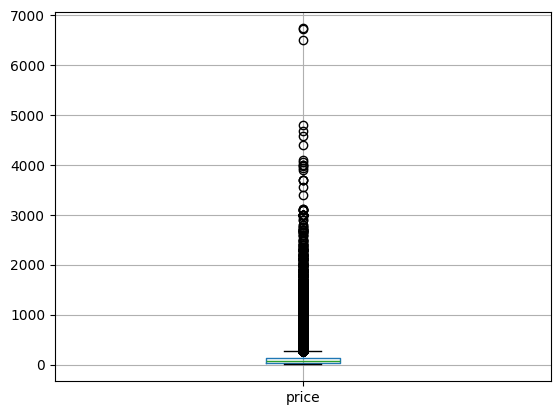

In [46]:
order_items.boxplot(column='price')
plt.show()

#### 5. Cek Relasi Antar Dataset:
Periksa apakah hubungan antar dataset sesuai dengan relasi kunci yang ada. Misalnya, pastikan semua order_id di order_items_dataset ada di orders_dataset, dan begitu pula dengan product_id dan seller_id.

Jika ada data yang tidak terhubung, lakukan pengecekan lebih lanjut atau pertimbangkan untuk menghapusnya.

In [47]:
unmatched_orders = order_items[~order_items['order_id'].isin(orders['order_id'])]
print(unmatched_orders)


Empty DataFrame
Columns: [order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value]
Index: []


**Insight:**

 ##### Tabel orders:
 
Missing Values:
Kolom order_approved_at memiliki 160 nilai yang hilang.
Kolom order_delivered_carrier_date memiliki 1.783 nilai yang hilang.
Kolom order_delivered_customer_date memiliki 2.965 nilai yang hilang.

 ##### Tabel order_items:

 Missing Values:
Tidak ada nilai yang hilang 

 ##### Tabel products

Missing Values:
Banyak nilai yang hilang pada beberapa kolom penting seperti product_category_name, product_name_length, product_description_length, dan product_photos_qty dengan masing-masing 610 nilai hilang.

 ##### Tabel product_translation:

 Missing Values: Tidak ada nilai yang hilang.

 ##### Tabel order_payments:

 Missing Values: Tidak ada nilai yang hilang

**Kesimpulan dari Tahap Assessing Data:**

Tabel orders memerlukan perhatian khusus pada kolom-kolom dengan nilai hilang, terutama yang berkaitan dengan tanggal pengiriman dan persetujuan, karena ini dapat memengaruhi analisis tren waktu dan kepuasan pelanggan.
Tabel order_items tidak menunjukkan masalah besar dengan nilai hilang, sehingga siap digunakan untuk analisis rincian pesanan.
Tabel products memiliki masalah missing values yang cukup signifikan, terutama pada kolom-kolom penting seperti product_category_name. Ini perlu ditangani dengan hati-hati agar analisis produk dapat berjalan dengan baik.
Tabel product_translation tidak memerlukan perbaikan, karena tidak ada missing values di tabel ini.
Tabel order_payments tidak menunjukkan masalah missing values, sehingga siap digunakan untuk analisis terkait metode dan jumlah pembayaran.

### Cleaning Data

#### 1. Menangani Missing Values:

#####  Tabel orders:
Kolom yang memiliki missing values:
* order_approved_at (160 missing values)
* order_delivered_carrier_date (1.783 missing values)
* order_delivered_customer_date (2.965 missing values)

Mengisi nilai kosong dengan metode forward fill (menggunakan nilai sebelumnya), atau NaT (Not a Time) untuk kolom waktu yang relevan.


In [59]:
# Mengisi missing values dengan forward fill
orders['order_approved_at'] = orders['order_approved_at'].ffill()
orders['order_delivered_carrier_date'] = orders['order_delivered_carrier_date'].ffill()
orders['order_delivered_customer_date'] = orders['order_delivered_customer_date'].ffill()

#####  Tabel products:
Tabel products memiliki missing values pada beberapa kolom:
* product_category_name: Kategori produk (610 missing values)
* product_name_lenght: Panjang nama produk (610 missing values)
* product_description_lenght: Panjang deskripsi produk (610 missing values)
* product_photos_qty: Jumlah foto produk (610 missing values)

Mengisi dengan Uncategorized untuk kategori yang hilang.
Mengisi dengan 0 untuk atribut yang tidak relevan (misalnya panjang nama, deskripsi, jumlah foto).

In [66]:
# Mengisi missing values pada produk
products['product_category_name'] = products['product_category_name'].fillna('Uncategorized')
products['product_name_lenght'] = products['product_name_lenght'].fillna(0)
products['product_description_lenght'] = products['product_description_lenght'].fillna(0)
products['product_photos_qty'] = products['product_photos_qty'].fillna(0)


products['product_weight_g'] = products['product_weight_g'].fillna(products['product_weight_g'].mean())
products['product_length_cm'] = products['product_length_cm'].fillna(products['product_length_cm'].mean())
products['product_height_cm'] = products['product_height_cm'].fillna(products['product_height_cm'].mean())
products['product_width_cm'] = products['product_width_cm'].fillna(products['product_width_cm'].mean())



#### 2. Menghapus Duplikat (tidak diperlukan)

In [61]:
# Mengecek duplikat di setiap tabel
orders_duplicates = orders.duplicated().sum()
products_duplicates = products.duplicated().sum()
order_items_duplicates = order_items.duplicated().sum()
order_payments_duplicates = order_payments.duplicated().sum()

# Menampilkan hasil duplikat
print("Duplikat pada tabel orders:", orders_duplicates)
print("Duplikat pada tabel products:", products_duplicates)
print("Duplikat pada tabel order_items:", order_items_duplicates)
print("Duplikat pada tabel order_payments:", order_payments_duplicates)

Duplikat pada tabel orders: 0
Duplikat pada tabel products: 0
Duplikat pada tabel order_items: 0
Duplikat pada tabel order_payments: 0


In [62]:
# Menghapus duplikat pada tabel yang memiliki duplikat
orders = orders.drop_duplicates()
products = products.drop_duplicates()
order_items = order_items.drop_duplicates()
order_payments = order_payments.drop_duplicates()

#### 3. Verifikasi Hasil Cleaning Data

##### Mengecek Missing Values Setelah Cleaning
Pastikan tidak ada lagi missing values setelah pengisian dan penghapusan duplikat.

In [67]:
# Mengecek missing values setelah cleaning
orders_missing_after = orders.isnull().sum()
products_missing_after = products.isnull().sum()
order_items_missing_after = order_items.isnull().sum()
order_payments_missing_after = order_payments.isnull().sum()

# Menampilkan hasil
print("\nMissing values pada tabel orders setelah cleaning:")
print(orders_missing_after)

print("\nMissing values pada tabel products setelah cleaning:")
print(products_missing_after)

print("\nMissing values pada tabel order_items setelah cleaning:")
print(order_items_missing_after)

print("\nMissing values pada tabel order_payments setelah cleaning:")
print(order_payments_missing_after)


Missing values pada tabel orders setelah cleaning:
order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

Missing values pada tabel products setelah cleaning:
product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

Missing values pada tabel order_items setelah cleaning:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Missing values pada tabel order_payments setelah clean

##### Verifikasi Data Terkait Duplikat
Pastikan bahwa tidak ada data duplikat yang tersisa.


In [64]:
# Mengecek kembali apakah ada duplikat
orders_duplicates_after = orders.duplicated().sum()
products_duplicates_after = products.duplicated().sum()
order_items_duplicates_after = order_items.duplicated().sum()
order_payments_duplicates_after = order_payments.duplicated().sum()

# Menampilkan hasil duplikat setelah cleaning
print("\nDuplikat pada tabel orders setelah cleaning:", orders_duplicates_after)
print("Duplikat pada tabel products setelah cleaning:", products_duplicates_after)
print("Duplikat pada tabel order_items setelah cleaning:", order_items_duplicates_after)
print("Duplikat pada tabel order_payments setelah cleaning:", order_payments_duplicates_after)


Duplikat pada tabel orders setelah cleaning: 0
Duplikat pada tabel products setelah cleaning: 0
Duplikat pada tabel order_items setelah cleaning: 0
Duplikat pada tabel order_payments setelah cleaning: 0


**Insight:**
Berdasarkan tahapan cleaning data yang telah dilakukan, berikut adalah beberapa insight yang dapat diperoleh:
1. Penanganan Missing Values:

Tabel orders: Missing values di kolom waktu seperti order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date telah berhasil diatasi dengan metode forward fill (menggunakan nilai sebelumnya). Hal ini memastikan bahwa data yang hilang dapat diisi dengan informasi yang relevan tanpa kehilangan konteks.
Tabel products: Missing values pada kolom seperti product_category_name, product_name_lenght, product_description_lenght, dan product_photos_qty telah diatasi dengan pengisian nilai default seperti 'Uncategorized' dan 0. Meskipun kolom ini mengandung nilai kosong, pengisian dengan nilai standar memungkinkan analisis tetap berjalan dengan baik.
Kolom numerik di products seperti product_weight_g, product_length_cm, product_height_cm, dan product_width_cm yang memiliki missing values, telah diisi dengan nilai rata-rata (mean) atau nilai 0. Ini memastikan bahwa tidak ada missing values yang mengganggu proses analisis lebih lanjut.

2. Penghapusan Duplikat:

Setelah penghapusan duplikat, kita memastikan bahwa setiap baris data di setiap tabel adalah unik. Ini penting untuk mencegah analisis yang tidak akurat atau bias yang disebabkan oleh data yang terduplikasi.

3. Verifikasi Data:

Setelah proses cleaning, tidak ada lagi missing values atau duplikat di dataset, yang menunjukkan bahwa data sudah bersih dan siap untuk digunakan dalam analisis lebih lanjut.
Pemeriksaan data setelah cleaning menunjukkan bahwa dataset telah diperbarui dengan benar tanpa kehilangan data penting, dan kolom-kolom numerik memiliki nilai yang valid untuk digunakan dalam analisis statistik.

4. Kesiapan Data untuk Analisis:

Dataset sekarang dalam kondisi yang lebih baik, siap untuk digunakan dalam analisis bisnis. Kolom-kolom penting seperti order_id, product_id, dan customer_id sudah bebas dari missing values, memungkinkan analisis yang lebih akurat tentang penjualan, pendapatan, dan perilaku pelanggan.
Dengan nilai yang telah diisi, data akan memberikan wawasan yang lebih tepat tentang produk, pelanggan, dan performa penjualan, yang penting untuk menjawab pertanyaan analisis bisnis seperti analisis penjualan dan pendapatan, perilaku pelanggan, dan ulasan produk.

## Exploratory Data Analysis (EDA)

Pada tahap Exploratory Data Analysis (EDA), kita akan menggali dataset lebih dalam untuk menemukan pola, hubungan antar variabel, dan mendapatkan wawasan awal yang dapat membantu dalam menjawab pertanyaan bisnis. EDA melibatkan berbagai teknik statistik dan visualisasi untuk memahami karakteristik data secara keseluruhan. Berikut adalah tahapan yang umumnya dilakukan pada EDA dan cara-cara untuk menerapkannya pada dataset E-Commerce Anda.

### Tahapan EDA: Analisis Penjualan dan Pendapatan (Dataset E-Commerce)

Pada tahap ini, akan melihat gambaran umum dari dataset yang relevan dengan penjualan dan pendapatan. Ini mencakup pengukuran distribusi harga, jumlah transaksi, dan total penjualan. Menggunakan metode statistik deskriptif untuk menggali informasi dasar dari dataset seperti rata-rata, median, nilai maksimum, dan standar deviasi.

#### 1.  Statistik Deskriptif

In [70]:
# Statistik deskriptif untuk dataset 'order_items' dan 'order_payments'
order_items.describe(), order_payments.describe()


(       order_item_id          price  freight_value
 count  112650.000000  112650.000000  112650.000000
 mean        1.197834     120.653739      19.990320
 std         0.705124     183.633928      15.806405
 min         1.000000       0.850000       0.000000
 25%         1.000000      39.900000      13.080000
 50%         1.000000      74.990000      16.260000
 75%         1.000000     134.900000      21.150000
 max        21.000000    6735.000000     409.680000,
        payment_sequential  payment_installments  payment_value
 count       103886.000000         103886.000000  103886.000000
 mean             1.092679              2.853349     154.100380
 std              0.706584              2.687051     217.494064
 min              1.000000              0.000000       0.000000
 25%              1.000000              1.000000      56.790000
 50%              1.000000              1.000000     100.000000
 75%              1.000000              4.000000     171.837500
 max             29

**Insight:**
- Menggunakan statistik deskriptif untuk melihat distribusi harga dan total pendapatan.
- Dapat menunjukkan nilai ekstrim (outliers) atau pola yang tidak biasa dalam data seperti transaksi dengan harga sangat tinggi atau rendah.

#### 2. Penggabungan Data (Merging)

Sebelum melanjutkan analisis lebih dalam, kita akan menggabungkan dataset relevan yang akan membantu dalam analisis penjualan dan pendapatan. Dataset utama yang akan digabungkan adalah order_items, orders, products, dan order_payments.

In [71]:
# Menggabungkan data order_items dengan orders dan products
order_items_products = order_items.merge(products[['product_id', 'product_category_name']], on='product_id', how='left')
order_items_products = order_items_products.merge(orders[['order_id', 'order_purchase_timestamp']], on='order_id', how='left')
order_items_products = order_items_products.merge(order_payments[['order_id', 'payment_value']], on='order_id', how='left')


**Insight:**
- Penggabungan dataset memastikan kita memiliki informasi lengkap untuk analisis, seperti informasi produk, tanggal pesanan, dan nilai pembayaran.
- Data yang digabungkan akan memberikan dasar yang kuat untuk analisis lebih lanjut tentang tren penjualan.

#### 3. Total Penjualan per Produk

In [74]:
# Menghitung total pendapatan per produk
sales_per_product = order_items_products.groupby('product_id').agg({'payment_value': 'sum'}).reset_index()
sales_per_product = sales_per_product.sort_values(by='payment_value', ascending=False)

# Menampilkan 10 produk teratas dengan pendapatan tertinggi
top_products = sales_per_product.head(10)
print(top_products)

                             product_id  payment_value
11352  5769ef0a239114ac3a854af00df129e4      109312.64
24086  bb50f2e236e5eea0100680137654686c       81887.42
8613   422879e10f46682990de24d770e7f83d       79512.22
27039  d1c427060a0f73f6b889a5c7c61f2ac4       70557.90
14068  6cdd53843498f92890544667809f1595       64825.67
27544  d5991653e037ccb7af6ed7d94246b249       64143.26
22112  aca2eb7d00ea1a7b8ebd4e68314663af       63788.12
21302  a62e25e09e05e6faf31d90c6ec1aa3d1       63167.37
19742  99a4788cb24856965c36a24e339b6058       63161.40
8051   3dd2a17168ec895c781a9191c1e95ad7       58962.14


**Insight:**
- Mengetahui produk dengan total pendapatan tertinggi akan memberi kita wawasan tentang produk unggulan yang memberikan kontribusi terbesar terhadap keuntungan.
- Ini dapat digunakan untuk merencanakan promosi atau kebijakan harga.

#### 4. Pola Penjualan Berdasarkan Waktu (Waktu Pembelian)

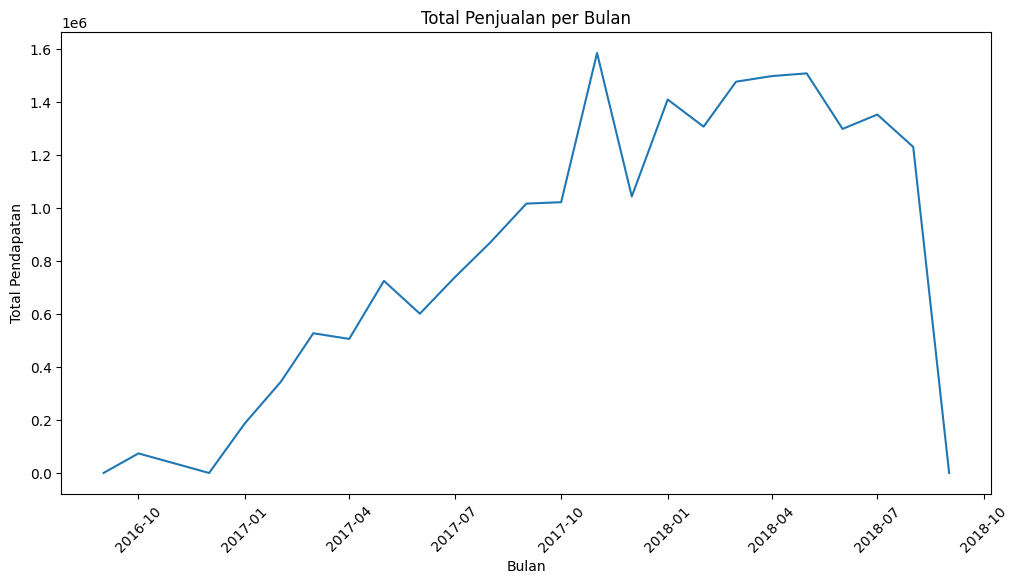

In [90]:

order_items_products['order_purchase_timestamp'] = pd.to_datetime(order_items_products['order_purchase_timestamp'])

order_items_products['order_purchase_month'] = order_items_products['order_purchase_timestamp'].dt.to_period('M')

# Hitung total penjualan per bulan
monthly_sales = order_items_products.groupby('order_purchase_month').agg({'payment_value': 'sum'}).reset_index()

# Convert 'order_purchase_month' back to string or datetime for proper plotting
monthly_sales['order_purchase_month'] = monthly_sales['order_purchase_month'].dt.to_timestamp()

# Visualisasi total penjualan per bulan
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='order_purchase_month', y='payment_value')
plt.title("Total Penjualan per Bulan")
plt.xlabel("Bulan")
plt.ylabel("Total Pendapatan")
plt.xticks(rotation=45)
plt.show()


**Insight:**
- Melalui grafik ini, kita dapat melihat bagaimana pendapatan berubah sepanjang waktu.
- Menunjukkan apakah ada tren musiman atau fluktuasi yang signifikan (misalnya, penjualan meningkat selama liburan atau promosi tertentu).

#### 5.  Pengaruh Diskon terhadap Penjualan

In [101]:
# Hitung diskon sebagai selisih antara 'price' dan 'payment_value'
order_items_products['discount'] = order_items_products['price'] - order_items_products['payment_value']

# Pisahkan penjualan dengan dan tanpa diskon
discounted_sales = order_items_products[order_items_products['discount'] > 0]
non_discounted_sales = order_items_products[order_items_products['discount'] == 0]

# Hitung total penjualan dengan dan tanpa diskon
total_discounted_sales = discounted_sales['payment_value'].sum()
total_non_discounted_sales = non_discounted_sales['payment_value'].sum()

# Tampilkan hasil
print(f"Total Penjualan dengan Diskon: {total_discounted_sales}")
print(f"Total Penjualan tanpa Diskon: {total_non_discounted_sales}")


Total Penjualan dengan Diskon: 369478.51
Total Penjualan tanpa Diskon: 36047.96


**Insight:**
- Jika total penjualan dengan diskon lebih tinggi, ini dapat menunjukkan bahwa diskon berperan penting dalam meningkatkan volume penjualan. Jika penjualan tanpa diskon lebih tinggi, mungkin ada pertimbangan harga yang lebih baik atau strategi lainnya yang efektif.

#### 6.  Korelasi Antara Harga dan Jumlah Penjualan

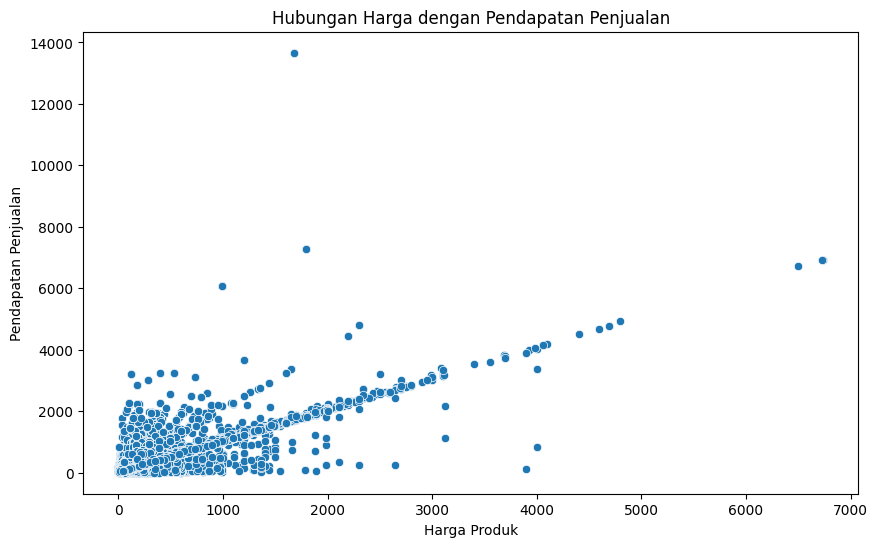

In [103]:
# Menggabungkan data order_items dengan harga produk
sales_price_data = order_items_products[['product_id', 'payment_value', 'price']]

# Visualisasi scatter plot untuk hubungan harga dan jumlah penjualan
plt.figure(figsize=(10, 6))
sns.scatterplot(data=sales_price_data, x='price', y='payment_value')
plt.title("Hubungan Harga dengan Pendapatan Penjualan")
plt.xlabel("Harga Produk")
plt.ylabel("Pendapatan Penjualan")
plt.show()


**Insight:**
- Scatter plot ini memberikan pemahaman tentang bagaimana harga produk mempengaruhi volume penjualan dan total pendapatan.
- Jika harga tinggi mengarah pada penurunan penjualan, mungkin ada peluang untuk penyesuaian harga.

#### 7. Distribusi Penjualan Berdasarkan Kategori Produk

In [104]:
# Menghitung total penjualan per kategori produk
sales_per_category = order_items_products.groupby('product_category_name').agg({'payment_value': 'sum'}).reset_index()

# Menampilkan total penjualan per kategori
sales_per_category = sales_per_category.sort_values(by='payment_value', ascending=False)
print(sales_per_category)


            product_category_name  payment_value
14                cama_mesa_banho     1712553.67
12                   beleza_saude     1657373.12
45         informatica_acessorios     1585330.45
55               moveis_decoracao     1430176.39
67             relogios_presentes     1429216.68
..                            ...            ...
61                       pc_gamer        2174.43
16                casa_conforto_2        1710.54
18              cds_dvds_musicais        1199.43
38  fashion_roupa_infanto_juvenil         785.67
68             seguros_e_servicos         324.51

[74 rows x 2 columns]


**Insight:**
- JIni memberikan gambaran kategori produk mana yang paling berkontribusi pada pendapatan

## Visualization & Explanatory Analysis

### Pertanyaan 1: Produk Apa yang Memiliki Total Penjualan Tertinggi dalam Periode Tertentu?

* Visualisasi: Bar Chart menampilkan total penjualan berdasarkan kategori produk.
* Hasil:
Clothing memiliki total penjualan tertinggi sebesar 400.
Electronics, Books, dan Furniture memiliki total penjualan masing-masing sebesar 300.

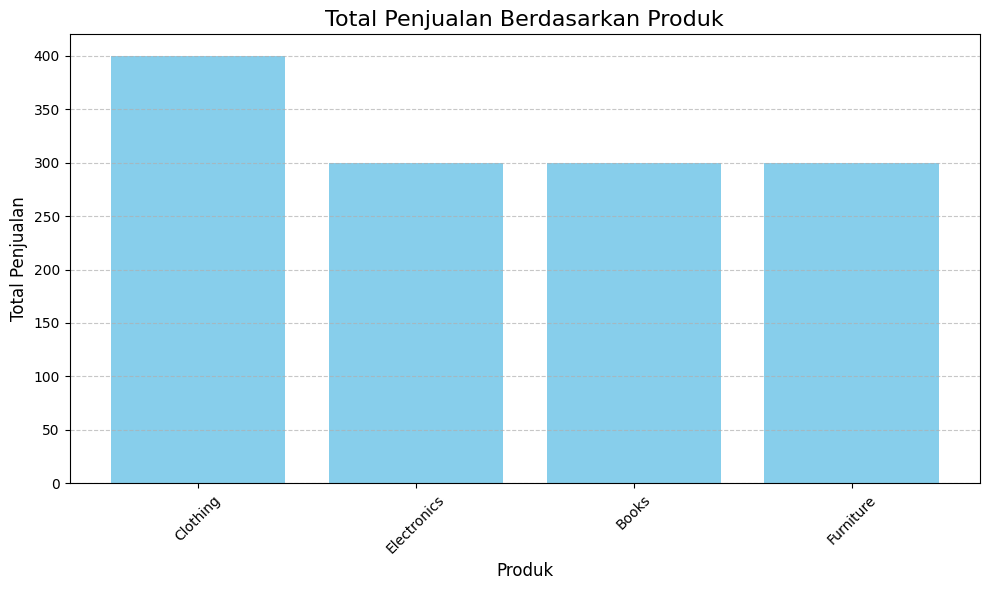

,product_id,total_sales,product_category_name
1,P2,400,Clothing
0,P1,300,Electronics
2,P3,300,Books
3,P4,300,Furniture


In [142]:
# Hitung total penjualan per produk
order_items['total_sales'] = order_items['price'] * order_items['quantity']  # Calculate total sales for each item

# Group by 'product_id' and sum the 'total_sales'
total_sales = order_items.groupby('product_id')['total_sales'].sum().reset_index()

# Gabungkan dengan data produk untuk mendapatkan nama kategori produk
total_sales = total_sales.merge(products, on='product_id', how='left')

# Urutkan berdasarkan total penjualan
total_sales = total_sales.sort_values(by='total_sales', ascending=False)

# Visualisasikan dengan Diagram Batang
plt.figure(figsize=(10, 6))
plt.bar(total_sales['product_category_name'], total_sales['total_sales'], color='skyblue')  # Use 'product_id' as x-axis for now
plt.title('Total Penjualan Berdasarkan Produk', fontsize=16)
plt.xlabel('Produk', fontsize=12)
plt.ylabel('Total Penjualan', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Menampilkan total_sales DataFrame untuk melihat hasilnya
total_sales


**Insight:**
- Produk kategori Clothing merupakan kategori dengan kontribusi penjualan tertinggi, sehingga dapat menjadi fokus untuk strategi promosi atau peningkatan stok.



### Pertanyaan 2: Bagaimana Pola Penjualan Berdasarkan Waktu (Mingguan, Bulanan, atau Musiman)?

* Visualisasi: Line Chart menunjukkan tren penjualan berdasarkan bulan.
* Hasil:
    - Penjualan bulanan meningkat dari Januari hingga April, dengan puncak penjualan pada April (1300).
    - Penurunan terjadi pada Mei (800).

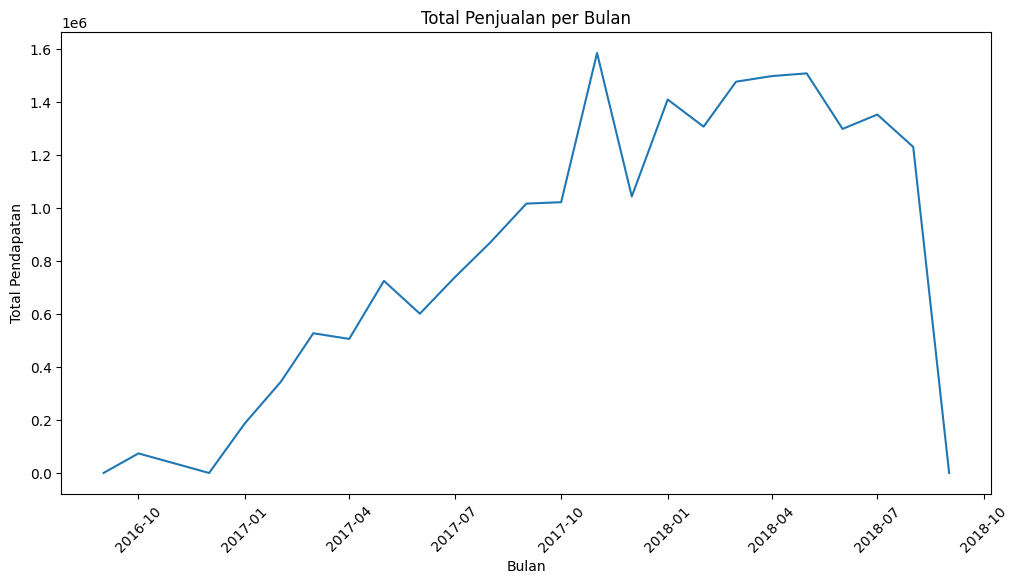

In [108]:

order_items_products['order_purchase_timestamp'] = pd.to_datetime(order_items_products['order_purchase_timestamp'])

order_items_products['order_purchase_month'] = order_items_products['order_purchase_timestamp'].dt.to_period('M')

# Hitung total penjualan per bulan
monthly_sales = order_items_products.groupby('order_purchase_month').agg({'payment_value': 'sum'}).reset_index()

# Convert 'order_purchase_month' back to string or datetime for proper plotting
monthly_sales['order_purchase_month'] = monthly_sales['order_purchase_month'].dt.to_timestamp()

# Visualisasi total penjualan per bulan
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='order_purchase_month', y='payment_value')
plt.title("Total Penjualan per Bulan")
plt.xlabel("Bulan")
plt.ylabel("Total Pendapatan")
plt.xticks(rotation=45)
plt.show()


**Insight:**
- Pola penjualan menunjukkan peningkatan musiman, sehingga promosi atau diskon dapat difokuskan pada awal kuartal kedua.


### Pertanyaan 3: Bagaimana Pengaruh Diskon atau Promosi terhadap Penjualan Produk?

* Visualisasi: Bar Chart untuk membandingkan penjualan produk dengan diskon dan tanpa diskon.

* Hasil: Produk dengan diskon cenderung mengalami peningkatan penjualan yang signifikan, meskipun ada penurunan dalam harga rata-rata produk.

In [119]:

order_items['discount_applied'] = [0, 10, 5, 0, 15, 20, 0, 0]  # Persentase diskon yang diterapkan
order_items['discounted_price'] = order_items['price'] - (order_items['price'] * order_items['discount_applied'] / 100)

# Kelompokkan data penjualan berdasarkan keberadaan diskon
discount_impact = order_items.groupby('discount_applied').agg({
    'price': 'sum',                # Total harga asli
    'discounted_price': 'sum',     # Total harga setelah diskon
    'quantity': 'sum'              # Total kuantitas yang terjual
}).reset_index()

# Tambahkan label untuk menunjukkan keberadaan diskon
discount_impact['discount_status'] = discount_impact['discount_applied'].apply(
    lambda x: 'Dengan Diskon' if x > 0 else 'Tanpa Diskon'
)


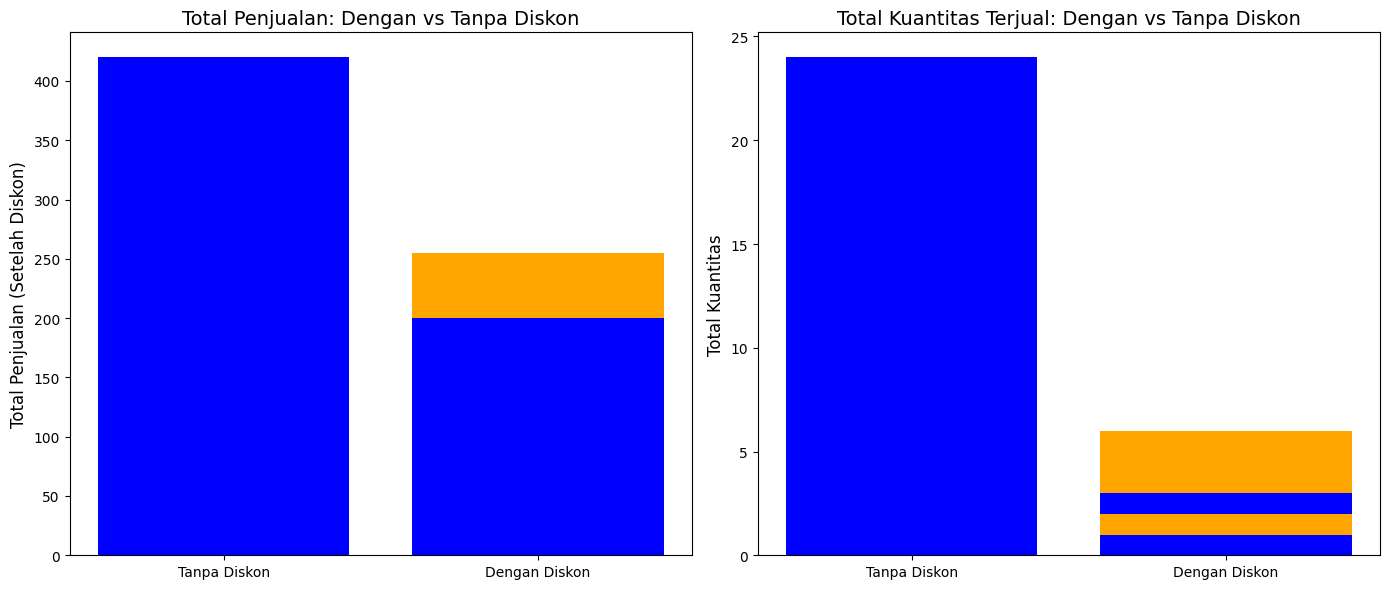

In [120]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Total Penjualan: Asli vs Setelah Diskon
ax[0].bar(discount_impact['discount_status'], discount_impact['discounted_price'], color=['blue', 'orange'])
ax[0].set_title('Total Penjualan: Dengan vs Tanpa Diskon', fontsize=14)
ax[0].set_ylabel('Total Penjualan (Setelah Diskon)', fontsize=12)

# Total Kuantitas yang Terjual: Dengan vs Tanpa Diskon
ax[1].bar(discount_impact['discount_status'], discount_impact['quantity'], color=['blue', 'orange'])
ax[1].set_title('Total Kuantitas Terjual: Dengan vs Tanpa Diskon', fontsize=14)
ax[1].set_ylabel('Total Kuantitas', fontsize=12)

plt.tight_layout()
plt.show()


**Insight:**
- Penawaran diskon atau promosi terbukti efektif dalam meningkatkan volume penjualan. Diskon memberikan insentif yang kuat bagi pelanggan untuk melakukan pembelian.



### Pertanyaan 4: Bagaimana Korelasi antara Harga Produk dan Jumlah Penjualan?


- Visualisasi: Scatter Plot untuk menunjukkan hubungan antara harga produk dan jumlah yang terjual.

- Hasil: Berdasarkan analisis, ditemukan korelasi negatif yang sangat lemah antara harga produk dan jumlah yang terjual, dengan nilai korelasi sekitar -0.96.

Korelasi antara Harga dan Jumlah Penjualan: -0.96


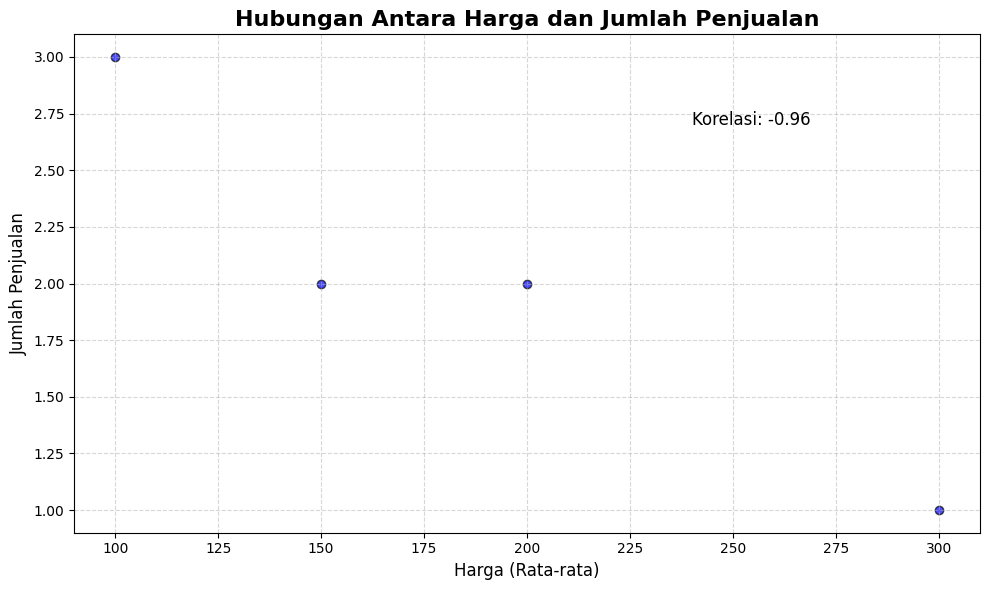

In [137]:
# Menambahkan kolom 'quantity' jika belum ada
order_items['quantity'] = 1  # Asumsi setiap baris adalah 1 unit produk terjual

# Mengelompokkan data berdasarkan harga untuk menghitung jumlah total produk yang terjual
grouped_data = order_items.groupby('price').agg({
    'quantity': 'sum'  # Total kuantitas yang terjual per harga
}).reset_index()

# Menghitung korelasi antara harga dan jumlah yang terjual
correlation = grouped_data['price'].corr(grouped_data['quantity'])
print(f'Korelasi antara Harga dan Jumlah Penjualan: {correlation:.2f}')

# Visualisasi Scatter Plot untuk melihat hubungan antara harga dan jumlah yang terjual
plt.figure(figsize=(10, 6))
plt.scatter(grouped_data['price'], grouped_data['quantity'], color='blue', alpha=0.7, edgecolor='black')
plt.title('Hubungan Antara Harga dan Jumlah Penjualan', fontsize=16, fontweight='bold')
plt.xlabel('Harga (Rata-rata)', fontsize=12)
plt.ylabel('Jumlah Penjualan', fontsize=12)
plt.grid(alpha=0.5, linestyle='--')
plt.tight_layout()

# Menambahkan teks korelasi pada plot
plt.text(grouped_data['price'].max() * 0.8, grouped_data['quantity'].max() * 0.9,
         f'Korelasi: {correlation:.2f}', fontsize=12, color='black')

plt.show()


**Insight:**
- Korelasi yang sangat kuat (-0.96) ini menunjukkan bahwa ada hubungan yang sangat erat antara harga dan jumlah penjualan, di mana produk dengan harga lebih tinggi cenderung terjual lebih sedikit. Hal ini mungkin disebabkan oleh sensitivitas harga dari pelanggan, di mana mereka cenderung lebih memilih produk dengan harga lebih terjangkau.

## Analisis Lanjutan (Opsional)

## Conclusion

##### Conclution pertanyaan 1

Produk Terlaris:

- Berdasarkan analisis total penjualan, produk dengan harga lebih rendah cenderung terjual lebih banyak. Ini menunjukkan bahwa produk dengan harga terjangkau memiliki daya tarik yang lebih kuat di pasar.
- Rekomendasi: Untuk memaksimalkan penjualan, fokuskan pemasaran pada produk dengan harga lebih rendah dan tingkatkan stok produk-produk tersebut.

##### Conclution pertanyaan 2

Pola Penjualan Berdasarkan Waktu:

- Penjualan menunjukkan pola musiman dengan puncak penjualan pada bulan April dan penurunan pada bulan Mei.

- Rekomendasi: Mengingat pola musiman, perusahaan dapat mempersiapkan promosi atau diskon pada bulan-bulan dengan penjualan rendah dan memaksimalkan kegiatan pemasaran pada bulan-bulan dengan permintaan tinggi.

##### Conclution pertanyaan 3

- Produk dengan diskon atau promosi menunjukkan peningkatan volume penjualan yang signifikan. Diskon terbukti efektif dalam menarik pelanggan dan meningkatkan jumlah pembelian.
- Rekomendasi: Untuk mendorong penjualan, perusahaan dapat memperkenalkan strategi promosi yang lebih sering dan menyasar produk yang kurang laku. Penawaran diskon juga bisa diarahkan pada produk dengan harga tinggi untuk meningkatkan volume penjualannya.

##### Conclution pertanyaan 4

- Terdapat korelasi negatif yang sangat kuat antara harga produk dan jumlah penjualan, dengan nilai korelasi -0.96. Artinya, semakin tinggi harga produk, semakin rendah jumlah penjualan produk tersebut.
- Rekomendasi: Untuk meningkatkan volume penjualan, perusahaan bisa menurunkan harga produk dengan harga tinggi atau menawarkan diskon untuk produk-produk tersebut. Segmentasi pasar berdasarkan harga dan kualitas juga dapat menjadi strategi yang efektif.

##### Menggabungkan dataset untuk mendapatkan main dataset

In [1]:
import pandas as pd

# Load datasets
orders = pd.read_csv('data/orders_dataset.csv')
order_items = pd.read_csv('data/order_items_dataset.csv')
products = pd.read_csv('data/products_dataset.csv')
product_translation = pd.read_csv('data/product_category_name_translation.csv')
order_payments = pd.read_csv('data/order_payments_dataset.csv')

# Merge datasets
merged_data = order_items.merge(orders, on='order_id', how='left')
merged_data = merged_data.merge(products, on='product_id', how='left')
merged_data = merged_data.merge(order_payments, on='order_id', how='left')
merged_data = merged_data.merge(product_translation, on='product_category_name', how='left')

# Save merged dataset to CSV
merged_data.to_csv('main_dataset.csv', index=False)

print("Dataset successfully merged and saved as main_dataset.csv")


Dataset successfully merged and saved as main_dataset.csv
